In [1]:
import json
from dictlearn.vocab import Vocabulary
from collections import Counter

def load_dict(filename):                   
    return json.load(open(filename, "r"))


#dict_snli = load_dict("data/dict_snli.json")
#dict_crawled = load_dict("data/dict_obw.json")
dict_crawled = load_dict("data/onebillionword/wn/dict_obw.json")

vocab = Vocabulary("data/onebillionword/vocab.txt")



In [15]:
import matplotlib.pyplot as plt
%matplotlib inline

def counts_len_def(dict_):
    n_defs = Counter()
    for k,v in dict_.iteritems():
        n_defs[len(v)] += 1
    return n_defs

def analyze_dict(dict_, vocab, top_k, max_len=30, max_def_num=14):
    words = vocab.words[5:]
    freqs = vocab.frequencies[5:]
    list_defs = [dict_.get(w, []) for w in words]
    list_defs = [defs for defs in list_defs if defs != [] ]
    n_defs = [len(list_def) for list_def in list_defs]
    print "min # of defs:", min(n_defs)
    print "max # of defs:", max(n_defs)
    print Counter(n_defs)
    plt.hist(n_defs, bins=(max(n_defs) - min(n_defs)))
    plt.title("Histogram of # of defs")
    plt.show()

    #def_lens = [len(def_) for list_defs in dict_.values() for def_ in list_defs]
    def_lens = [len(def_) for defs in list_defs for def_ in defs ]
    print "min len of def:", min(def_lens)
    print "max len of def:", max(def_lens)
    plt.hist(def_lens, bins=(max(def_lens) - min(def_lens)))
    plt.title("Histogram of length of defs")
    plt.show()

    inf_len = sum([1 if dl > max_len else 0 for dl in def_lens])
    sup_len = sum([1 if dl <= max_len else 0 for dl in def_lens])
    print "percent of def which len <= " + str(max_len), (inf_len * 100.) / (inf_len + sup_len)
    
    inf_num = sum([1 if dl > max_def_num else 0 for dl in n_defs])
    sup_num = sum([1 if dl <= max_def_num else 0 for dl in n_defs])
    print "percent of entries wheere # def <= " + str(max_def_num), (inf_num * 100.) / (inf_num + sup_num)




min # of defs: 1
max # of defs: 75
Counter({1: 31610, 2: 11368, 3: 5215, 4: 2720, 5: 1702, 6: 1043, 7: 815, 8: 463, 9: 356, 10: 279, 11: 202, 12: 151, 13: 130, 14: 86, 15: 85, 16: 72, 17: 60, 18: 54, 20: 28, 22: 28, 19: 26, 21: 24, 23: 19, 24: 14, 25: 14, 27: 10, 26: 9, 30: 7, 36: 7, 38: 7, 28: 6, 31: 6, 34: 6, 37: 6, 29: 5, 44: 5, 45: 5, 32: 4, 52: 4, 33: 3, 35: 2, 39: 2, 40: 2, 41: 2, 42: 2, 43: 2, 47: 2, 60: 2, 46: 1, 48: 1, 50: 1, 51: 1, 54: 1, 57: 1, 70: 1, 72: 1, 75: 1})


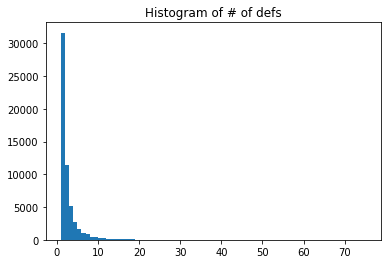

min len of def: 1
max len of def: 79


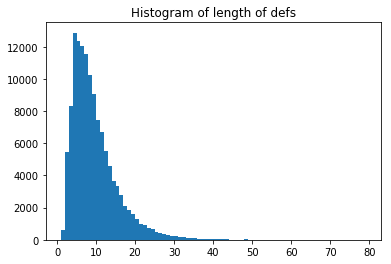

percent of def which len <= 30 0.880406341388
percent of entries wheere # def <= 14 0.950969494875


In [16]:
top_k=10000

#analyze_dict(dict_snli, vocab, top_k)
analyze_dict(dict_crawled, vocab, top_k)